# Lab-4:
In this lab, we will examine some classifiers, and the regularization concept in the classification problem.
Also, we will see

### Objectives:
1. Lasso and Ridge
2. Naïve Bayes
3. KNN
4. Cross Validation

---
## Lasso and Ridge
Both models are the regularized forms of the linear regression.
Lass with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coefficients/weight, where they must reside in.

### Issues:
1. When to use Lasso? 

2. When to use Ridge? 

3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda? 

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

### Loading Boston dataset
Housing-Prices Values in Suburbs of Boston.

In [2]:
X, y = load_boston(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

/Users/sirojiddinkomolov/Documents/innopolis/fall22/intro-to-ml-folder/course-content/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1

### Fitting both Lasso and Ridge
Task:

Fit two models: Lasso and Ridge - with the default alpha-.
Then print their coefficients and notice the difference.

In [3]:
from sklearn.linear_model import Lasso, Ridge

# write code here
lasso = None
ridge = None

print("Lasso Coefficient:", *lasso.coef_, sep='\n\t')
print("Ridge Coefficient:", *ridge.coef_, sep='\n\t')
print('Sum of lasso abs values:', np.sum(np.abs(lasso.coef_)))
print('Sum of ridge abs values:', np.sum(np.abs(ridge.coef_)))

Lasso Coefficient:
	-0.06296576330463614
	0.0350956639719025
	0.0
	0.0
	-0.0
	2.269791338462823
	0.0006779558466116866
	-0.6450657726354462
	0.19354572704933157
	-0.013508702669918599
	-0.6453458726466407
	0.0044904218480321285
	-0.6731506757847043
Ridge Coefficient:
	-0.11105798056135398
	0.03658528048290767
	0.04692128541593313
	0.6038241348013504
	-6.9746056522676145
	5.11864285160244
	-0.026987022704628917
	-1.2282427950710855
	0.24913980673174493
	-0.013989976538037296
	-0.8478133115629521
	0.006954220877156475
	-0.468816487085446
Sum of lasso abs values: 4.543637894220047
Sum of ridge abs values: 15.73358080570265


<span style="color:red">
Task: Let's try different values for alpha for Lasso and Ridge regressors then
plot the validation loss.

<Figure size 432x288 with 0 Axes>

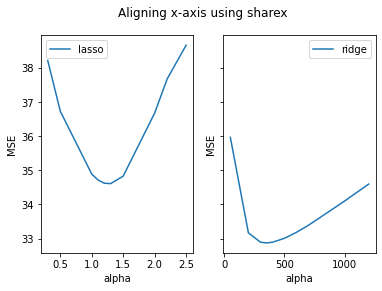

Best value of alpha for lasso: 1.3
Best value of alpha for ridge: 350


In [4]:
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

lasso_alphas = [0.3, 0.5, 1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5]
ridge_alphas = [50, 200, 300, 350, 400, 500, 600, 700, 1000, 1200]
lasso_losses = []
ridge_losses = []
for i in range(len(lasso_alphas)):
    # Create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean squared error loss, then append it to the losses array
    lasso = None
    
    y_pred = None
    mse = None
    lasso_losses.append(mse)

    ridge = None
    
    y_pred = None
    mse = None
    ridge_losses.append(mse)

plt.suptitle('The effect of changing alpha on MSE for lasso and ridge')



# plt.figure(figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Aligning x-axis using sharex')

ax1.plot(lasso_alphas, lasso_losses, label='lasso')
ax1.legend()
ax1.set(xlabel='alpha', ylabel='MSE')

ax2.plot(ridge_alphas, ridge_losses, label='ridge')
ax2.legend()
ax2.set(xlabel='alpha', ylabel='MSE')

plt.show()

lasso_best_alpha = lasso_alphas[np.argmin(lasso_losses)]
ridge_best_alpha = ridge_alphas[np.argmin(ridge_losses)]
print("Best value of alpha for lasso:", lasso_best_alpha)
print("Best value of alpha for ridge:", ridge_best_alpha)

Measuring the loss on the test set with Lasso and ridge regressors with the
best alpha.

In [5]:
lasso = Lasso(lasso_best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Lasso MSE on test set:", mean_squared_error(y_test, y_pred))

ridge = Ridge(ridge_best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge MSE on test set:", mean_squared_error(y_test, y_pred))

Lasso MSE on test set: 31.953762880829828
Ridge MSE on test set: 30.119886865223602


## Loading the iris dataset
Dataset of 3 types/classes of flowers with 4 features. Suitable for classification!

In [7]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We will show why we didn't split a validation set.

## Naïve Bayes
We will use the Gaussian Naïve Bayes, that deals -as a assumption- with the continous features as gaussian variables to compute their probability.

$$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}exp(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})$$

While $\mu_y$ and $\sigma_y^2$ are the mean and the variance of the feature $i$ for class $y$.

Note: The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$.

___
What are the pros and cons of Naive bayes classifier?
___

Let's train a naive-bayes model and check the test accuracy.


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create and fit GaussianNB model on the training set
gauss_nb = None

y_pred = gauss_nb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8361111111111111


## K nearest neighbour classifier
1. What are the pros and cons of KNN?
   

2. To increase the variance of KNN model, should we increase or decrease the K? 

___
Let's do the same with KNN classifier.


Rescale the features first.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create and train the KNN model on the training set
knn = None

y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9805555555555555


Let's tune the hyperparameter $n\_neighbors$ in the KNN classifier object using the cross-validation.

___
## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

Note: that's why we didn't make a validation set.

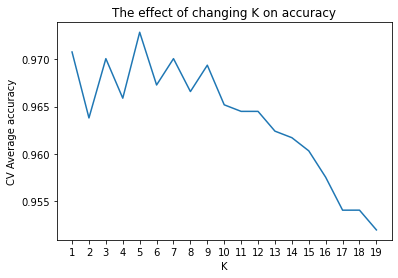

Best K: 5


In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    # create a KNN model with the K parameter
    knn = None

    # Evaluate a score by cross-validation by setting knn model as an estimator
    # and specify the number of folds to 7, set metric as accuracy

    scores = None

    # calculate the mean score
    avg_score = None

    cv_scores.append(avg_score)

plt.title('The effect of changing K on accuracy')
plt.plot(Ks, cv_scores)
plt.xlabel('K')
plt.xticks(Ks)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', Ks[np.argmax(cv_scores)])

In KNN classifier, there are several hyperparamters to tune, tuning them one
by one is exhaustive approach. Let's try a better approach called GridSearchCV.

### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

Task:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/modules/grid_search.html)
for help.

Then measure the accuracy on the test set.

In [11]:
from sklearn.model_selection import GridSearchCV

# Modify the next lines to run GridSearchCV with cv=7
param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

# create a GridSearch cross validation with cv=7, 
# and accuracy as scoring, and specify param_grid


grid_search_clf = None
# then train on the train dataset


means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.971 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.971 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.964 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.971 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.970 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.971 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.966 (+/-0.024) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.973 (+/-0.020) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.973 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.973 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.967 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.971 (+/-0.020) for {'metric': 'euclidean', 'n_neighbors': 